In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ivv_normal.csv")
df['ret'] = df['close'].pct_change()

Text(0, 0.5, 'Autocorrelation')

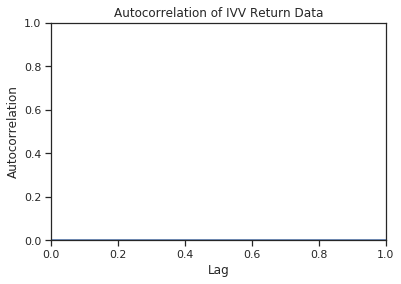

In [23]:
#autocorrelation
data = df['ret']
plt.acorr(data, maxlags=1000)
plt.title('Autocorrelation of IVV Return Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

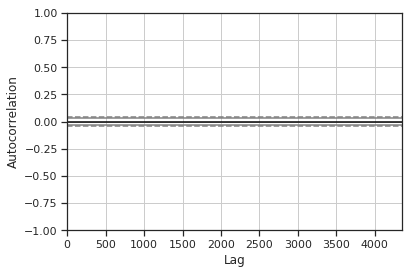

In [26]:
from pandas.plotting import autocorrelation_plot
data = df['ret']
autocorrelation_plot(data)

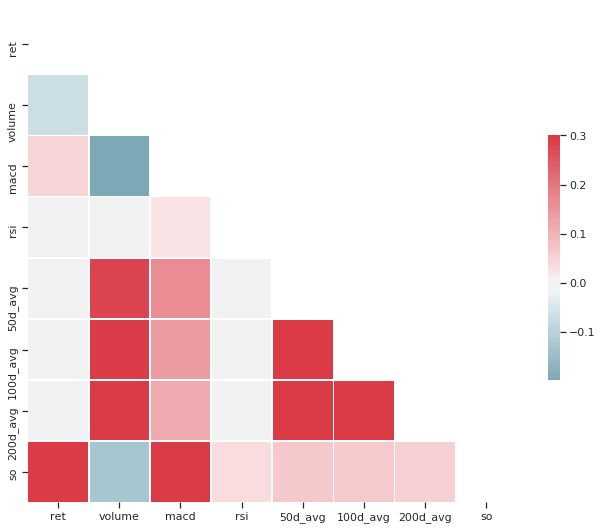

In [3]:
import seaborn as sns; sns.set(style="ticks",color_codes=True)
import numpy as np
df_ret_corr = df[['ret', 'volume','macd', 'rsi', '50d_avg', '100d_avg', '200d_avg', 'so']]
corr = df_ret_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/home/shiyun/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shiyun/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


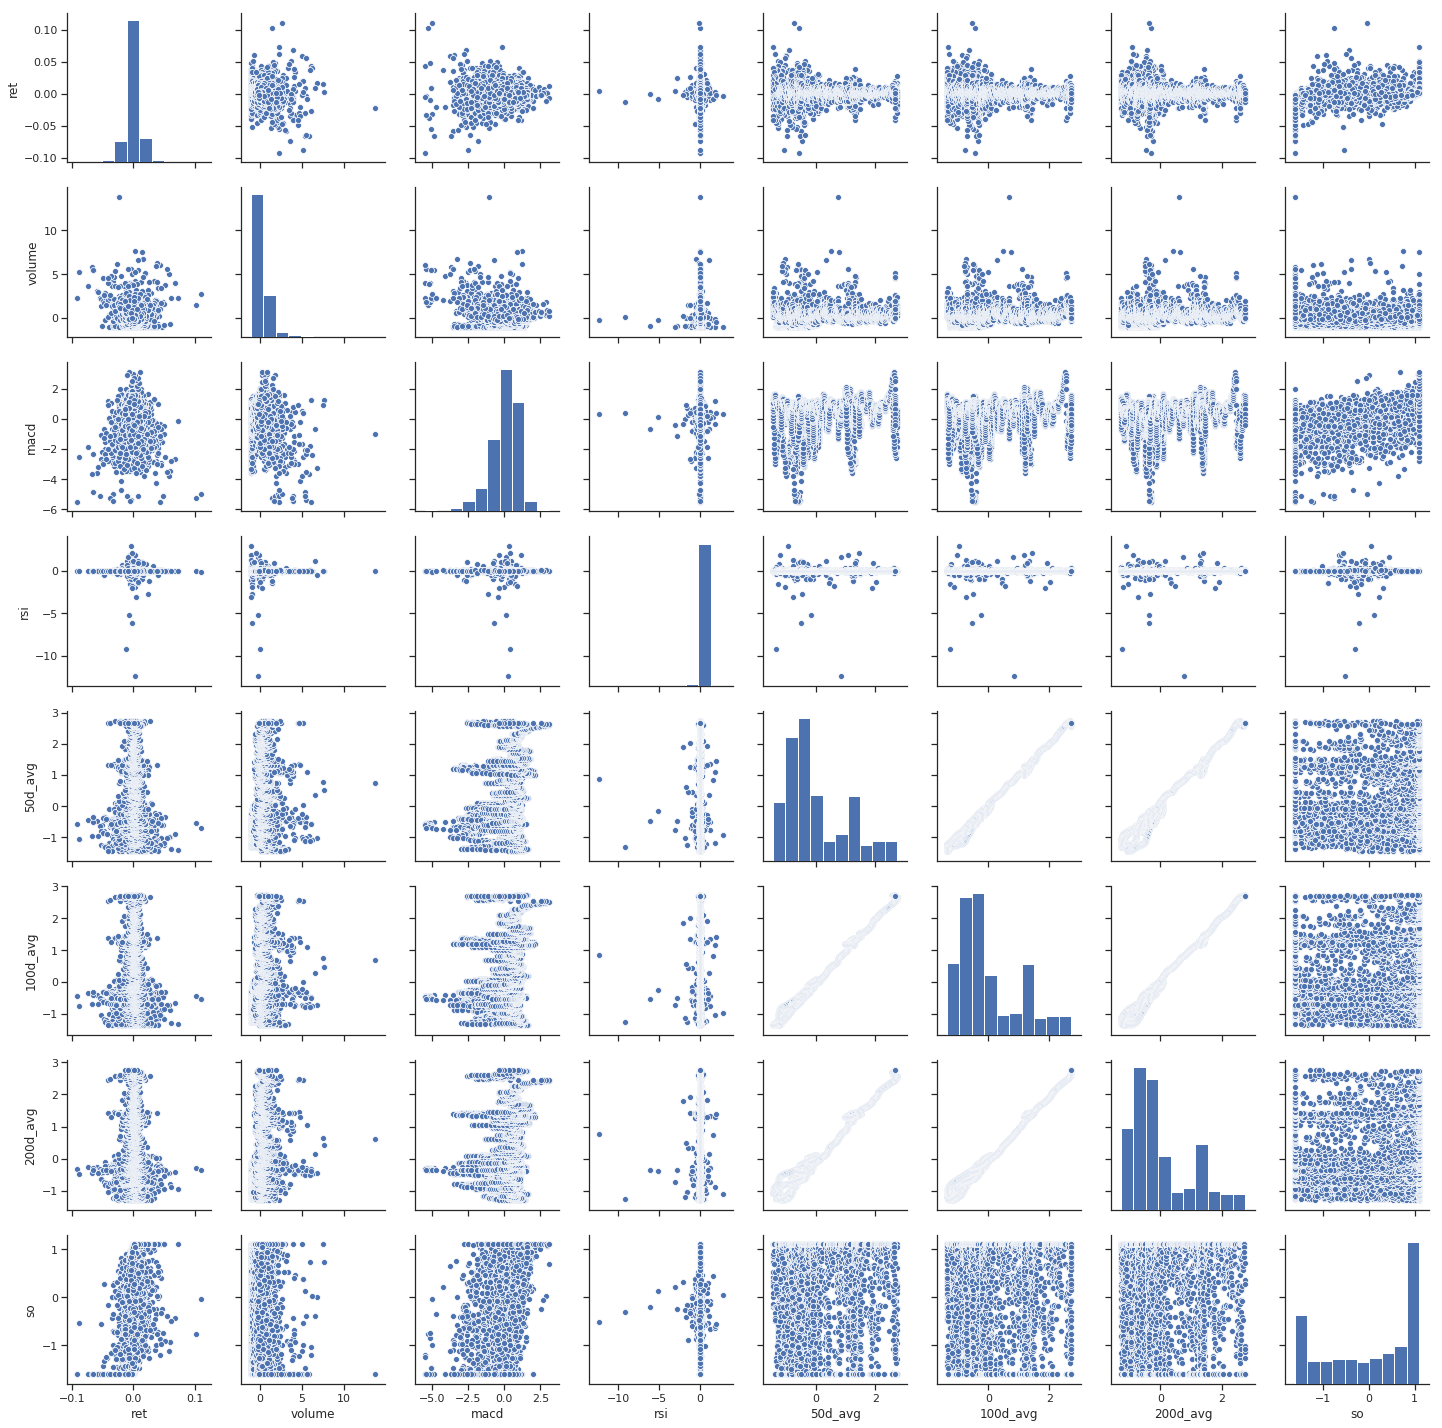

In [4]:
g = sns.pairplot(df_ret_corr)

/home/shiyun/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


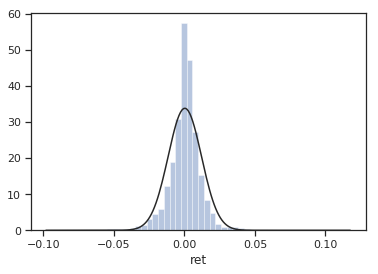

In [5]:
from scipy import stats

loc = df['ret'].mean()
scale = df['ret'].std()
x = np.random.normal(loc, scale)
sns.distplot(df['ret'][1:], kde=False, fit=stats.norm)

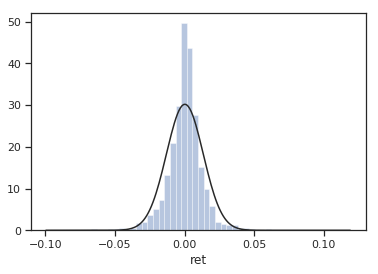

In [15]:
#distribution of the training set

loc = df['ret'][1:3000].mean()
scale = df['ret'][1:3000].std()
x = np.random.normal(loc, scale)
sns.distplot(df['ret'][1:3000], kde=False, fit=stats.norm)

In [17]:
stats.kurtosis(np.asarray(df['ret'][1:3000]))

7.412612241337561

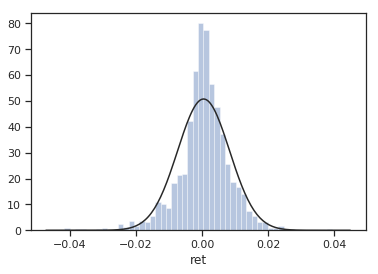

In [13]:
#distribution of the test set
loc = df['ret'][3000:].mean()
scale = df['ret'][3000:].std()
x = np.random.normal(loc, scale)
sns.distplot(df['ret'][3000:], kde=False, fit=stats.norm)

In [18]:
stats.kurtosis(np.asarray(df['ret'][3000:]))

3.147969056271287

In [28]:
stats.kurtosis(np.asarray(df['ret'][1:]))

8.607152316971623

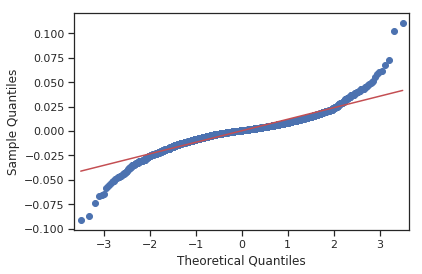

In [29]:
#qq plot of the entire IVV return series
import statsmodels.api as sm
probplot = sm.ProbPlot(np.asarray(df['ret'][1:]))
fig = probplot.qqplot(line='s')
plt.show()